<a href="https://colab.research.google.com/github/naufalihsan/tesseract/blob/master/Predict_Text_DOKU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files

uploaded = files.upload()

Saving dw_customer_5000.csv to dw_customer_5000.csv


In [0]:
df = pd.read_csv('dw_customer_5000.csv', delimiter='|')

In [0]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4987 entries, 0 to 4999
Data columns (total 6 columns):
customer_name     4987 non-null object
address           4987 non-null object
place_of_birth    4987 non-null object
birth_date        4987 non-null object
ic_number         4987 non-null object
gender            4987 non-null object
dtypes: object(6)
memory usage: 272.7+ KB


In [0]:
df.head()

In [0]:
name = df.customer_name

In [0]:
def clean_name(name):
  return name.lower()

In [0]:
name = name.apply(clean_name)

In [0]:
nf = { 'entity': name, 'category': 'nama' } 
df1 = pd.DataFrame(nf) 

In [0]:
address = df.address

In [0]:
import re

def clean_address(addr):
  return re.sub('[^A-Za-z0-9]+', ' ', addr).lower()

In [0]:
address = address.apply(clean_address)

In [0]:
af = { 'entity': address, 'category': 'alamat' } 
df2 = pd.DataFrame(af) 

In [0]:
birthday = df.place_of_birth + ' ' + df.birth_date

In [0]:
def clean_birthday(birth):
  ttl = birth.strip().split(" ")
  print(ttl)
  ttl[0] = ttl[0].lower()
  ttl[-2] = rearrange_birthday(ttl[-2])
  return ' '.join(ttl[:-1])

def rearrange_birthday(date):
  print(date)
  dates = date.split("-")
  return f'{dates[2]} {dates[1]} {dates[0]}'

In [0]:
birthday = birthday.apply(clean_birthday)

In [0]:
bf = { 'entity': birthday, 'category': 'ttl' } 
df3 = pd.DataFrame(bf) 

In [0]:
icf = { 'entity': df.ic_number, 'category': 'nik' }
df4 = pd.DataFrame(icf) 

In [0]:
gender = df.gender

In [0]:
import random

def clean_gender(gender):
  m_list = ['pria','laki laki']
  f_list = ['wanita','perempuan']
  if gender == 'M':
    return random.choice(m_list)
  return random.choice(f_list)

In [0]:
gender = gender.apply(clean_gender)

In [0]:
gf = { 'entity': gender, 'category': 'gender' } 
df5 = pd.DataFrame(gf)

In [0]:
display(df1.head())
display(df2.head())
display(df3.head())
display(df4.head())
display(df5.head())

In [0]:
df1 = df1.append(df2, ignore_index=True).append(df3, ignore_index=True).append(df4, ignore_index=True).append(df5, ignore_index=True)

DOWNLOAD CLEAN DATA

In [0]:
# df1.to_csv('train.csv')
# files.download('train.csv')

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
word_mat = count_vect.fit_transform(df1.entity)

In [0]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
target = encoder.fit_transform(df1.category)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(word_mat, target, test_size = 0.3, random_state = 100)

In [80]:
code = dict(zip(encoder.transform(encoder.classes_), encoder.classes_))
code

{0: 'alamat', 1: 'gender', 2: 'nama', 3: 'nik', 4: 'ttl'}

In [0]:
predict_words = ['naufal ihsan pratama','jl juraganan rt 01 no 25','laki laki','bahy helmi hartoyo']
preds = count_vect.transform(predict_words)

In [82]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
def evaluation_test(predicts):
  for types, category in zip(predict_words, predicts):
    print(f'{types} => {code[category]}')

In [96]:
mnb_preds = mnb.predict(preds)
evaluation_test(mnb_preds)

naufal ihsan pratama => nama
jl juraganan rt 01 no 25 => alamat
laki laki => gender
bahy helmi hartoyo => nama


In [104]:
print(f'MultinomialNB Score => {mnb.score(X_test, y_test)}')

MultinomialNB Score => 0.9357037829167224


Text(0.5, 1.0, 'Confusion Matrix MultinomialNB')

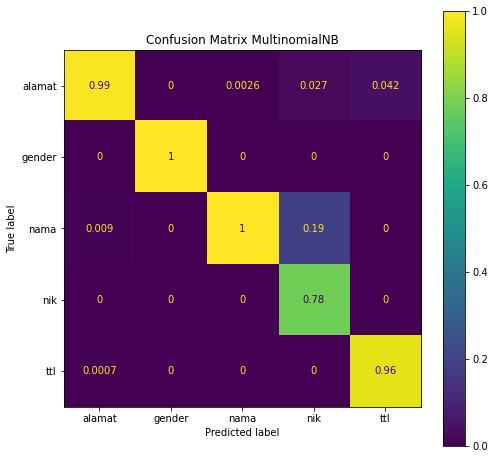

In [102]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib as plt

mnb_disp = plot_confusion_matrix(mnb, X_test, y_test,
                                 display_labels= encoder.classes_,
                                 cmap=plt.cm.viridis,normalize='pred')
mnb_disp.figure_.set_size_inches(8,8)
mnb_disp.ax_.set_title('Confusion Matrix MultinomialNB')

In [103]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [105]:
gbc_preds = mnb.predict(preds)
evaluation_test(gbc_preds)

naufal ihsan pratama => nama
jl juraganan rt 01 no 25 => alamat
laki laki => gender
bahy helmi hartoyo => nama


In [106]:
print(f'Gradient Boost Score => {gbc.score(X_test, y_test)}')

Gradient Boost Score => 0.841999732656062


Download Models

In [0]:
from joblib import dump

downloads = [(count_vect,'count_vect.joblib'), (encoder,'encoder.joblib'), (mnb,'mnb.joblib')]

In [0]:
for obj,file_name in downloads:
  dump(obj, file_name)
  files.download(file_name)